# Regresión lineal para predecir los gastos médicos de pacientes

Utilizando como inicio datos del US Census Bureau se recabaron datos de gastos en seguros de datos médicos de varios pacientes:
![](variables.PNG)

[Datos.](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## Librerías

In [34]:
%pip install scipy regressors 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborn.apionly (from versions: none)
ERROR: No matching distribution found for seaborn.apionly


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from regressors import stats


## Estilos para los gráficos

In [7]:
sns.set(style = "whitegrid", context = "notebook", font_scale = 1.5)
plt.rcParams["figure.figsize"] = (11, 9.4)

## Cargar los datos

In [8]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Análisis de los datos

### Validación de los datos

#### **¿Qué tipo de dato son las variables del conjunto de datos?**

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### **¿Cuántas variables de cada tipo hay en el conjunto de datos?**

In [10]:
df.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

Vemos que hay 4 variables numéricas y 3 variables categóricas.

#### **¿Cuántas variables y observaciones hay en el conjunto de datos?**

In [11]:
df.shape

(1338, 7)

En el conjunto de datos tenemos 1338 observaciones para 7 variables.

#### **¿Existen valores faltantes en el conjunto de datos?**

In [12]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Vemos que no hay valores faltantes.

### Describir el conjunto de datos

#### **Variables numéricas**

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Vemos que el promedio de la edad es de 40 años; el 75% de los pacientes tienen 2 o menos hijos; el 25% de las personas tienen un índice de masa corporal menor o igual a 26.29 lo cual nos indica que hay una gran cantidad de pacientes con problemas de peso.

![](bmi-adult.jpg)

#### **Variables categóricas**

In [14]:
df.describe(include = object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Vemos que la mayoría de los pacientes son hombres; la mayoría de las personas no fuman.

#### **Proporciones por sexo**

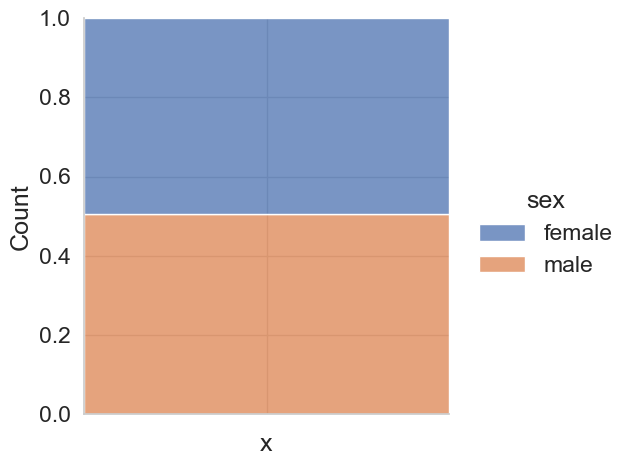

In [15]:
df.add_column("x", "").pipe(lambda df: sns.displot(
    data = df, # El conjunto de datos
    x = "x", # La columna vacía que creamos
    hue = "sex", # Agrupamos por especie
    multiple = "fill" # Muestre el gráfico en proporción
))
plt.show()

#### **Proporciones por fumadores**

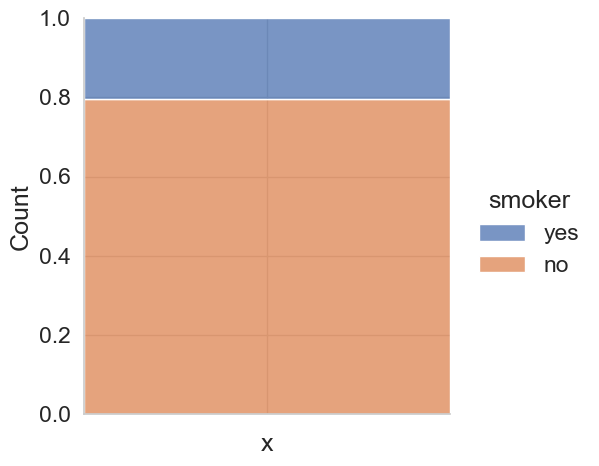

In [16]:
df.add_column("x", "").pipe(lambda df: sns.displot(
    data = df, # El conjunto de datos
    x = "x", # La columna vacía que creamos
    hue = "smoker", # Agrupamos por especie
    multiple = "fill" # Muestre el gráfico en proporción
))
plt.show()

#### **Proporciones por región**

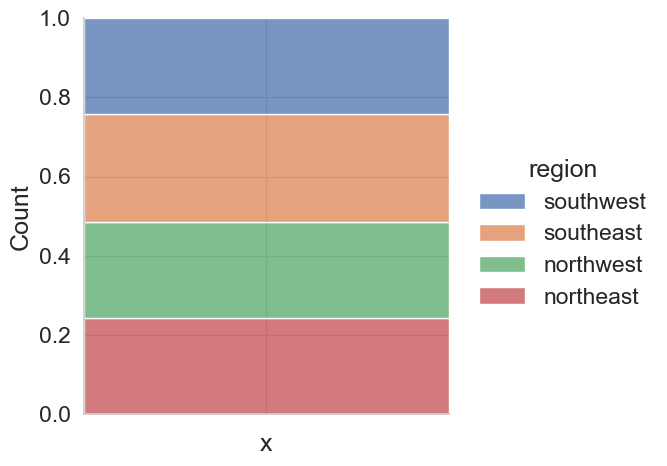

In [17]:
df.add_column("x", "").pipe(lambda df: sns.displot(
    data = df, # El conjunto de datos
    x = "x", # La columna vacía que creamos
    hue = "region", # Agrupamos por especie
    multiple = "fill" # Muestre el gráfico en proporción
))
plt.show()

### Visualización

#### **Distribución de la variable Charges**

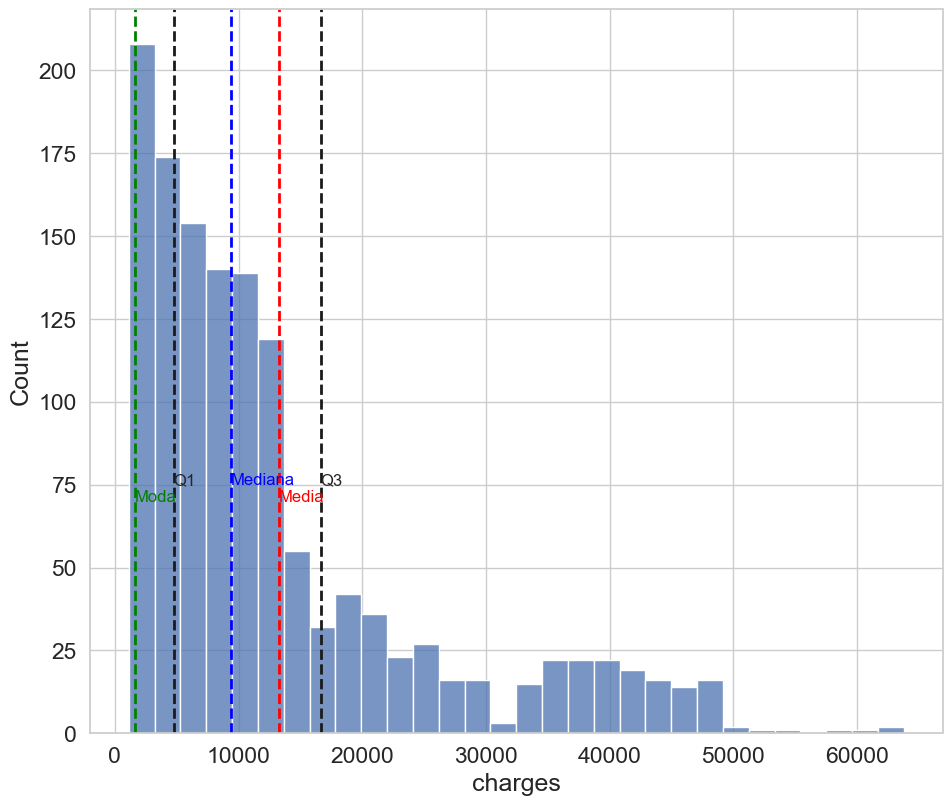

In [18]:
# Histograma de la distribución del largo de las aletas
sns.histplot(data = df, x = "charges")

# Graficamos una línea vertical con la media de los costos
plt.axvline(x = df.charges.mean(),
            color = "red", # Color rojo
            linestyle = "dashed", # Estilo de la línea punteado
            linewidth = 2) # Tamaño de la línea

# Graficamos una línea vertical con la mediana de los costos
plt.axvline(x = df.charges.median(),
            color = "blue", # Color azul
            linestyle = "dashed", # Estilo de la línea punteado
            linewidth = 2) # Tamaño de la línea)

# Graficamos una línea vertical con la moda de los costos
plt.axvline(x = df.charges.mode().item(),
            color = "green", # Color verde
            linestyle = "dashed", # Estilo de la línea punteado
            linewidth = 2) # Tamaño de la línea)

# Graficamos una línea vertical que representa el Q3
plt.axvline(x = df.charges.quantile(0.75),
            color = "k",
            linestyle = "dashed",
            linewidth = 2)

# Graficamos una línea vertical que representa el Q1
plt.axvline(x = df.charges.quantile(0.25),
            color = "k",
            linestyle = "dashed",
            linewidth = 2)

# Texto para la media
plt.text(x = df.charges.mean() + 1, y = 70, s = "Media", fontsize = 12, color = "red")
# Texto para la mediana
plt.text(x = df.charges.median(), y = 75, s = "Mediana", fontsize = 12, color = "blue")
# Texto para la moda
plt.text(x = df.charges.mode().item() - 3.5, y = 70, s = "Moda", fontsize = 12, color = "green")
# Texto para el Q3
plt.text(x = df.charges.quantile(0.75) + 0.5, y = 75, s = "Q3",fontsize = 12)
# Texto para el Q1
plt.text(x = df.charges.quantile(0.25) - 2, y = 75, s = "Q1",fontsize = 12)

plt.show()

#### **Boxplot para Charges**

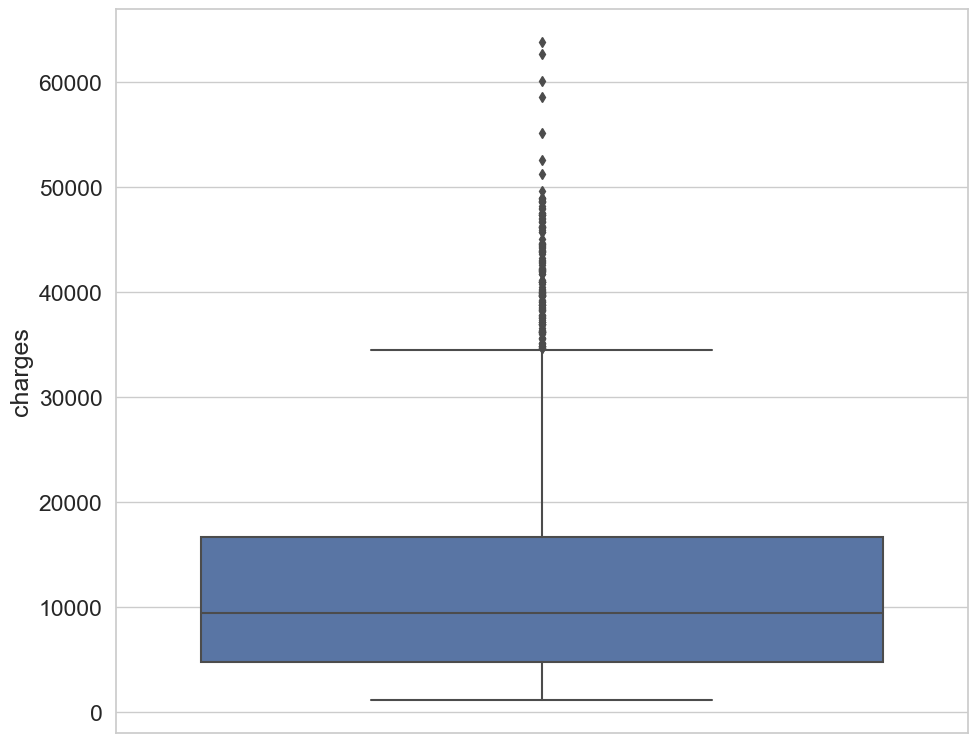

In [19]:
sns.boxplot(
    data = df,
    y = "charges"
)
plt.show()

Con estos dos gráficos podemos observar que hay muchos valores atípicos para los gastos a partir de aproximadamente los 35000; hay una gran concentración de los datos entre 0 y aproximadamente los 20000.

Si exploramos un poco más vemos que los gastos mayores a 50000 no son tantos.

In [20]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


EN ESTE CASO se eliminarán estos datos para disminuir el sesgo a la hora de crear el modelo.

In [21]:
df = df[df.charges <= 50000]

### Correlaciones

Ahora vamos a profundizar un poco en cómo se relacionan las variables numéricas con Charges que es la variable que queremos predecir.

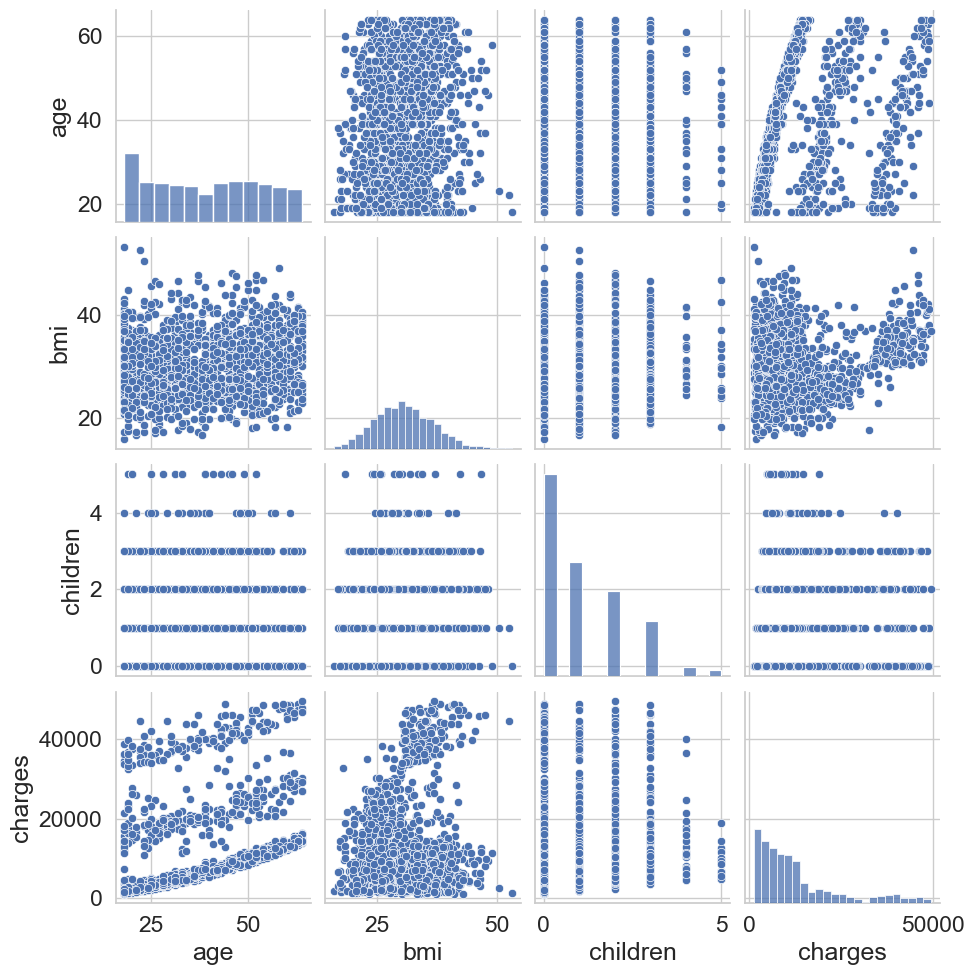

In [22]:
sns.pairplot(data = df)
plt.show()

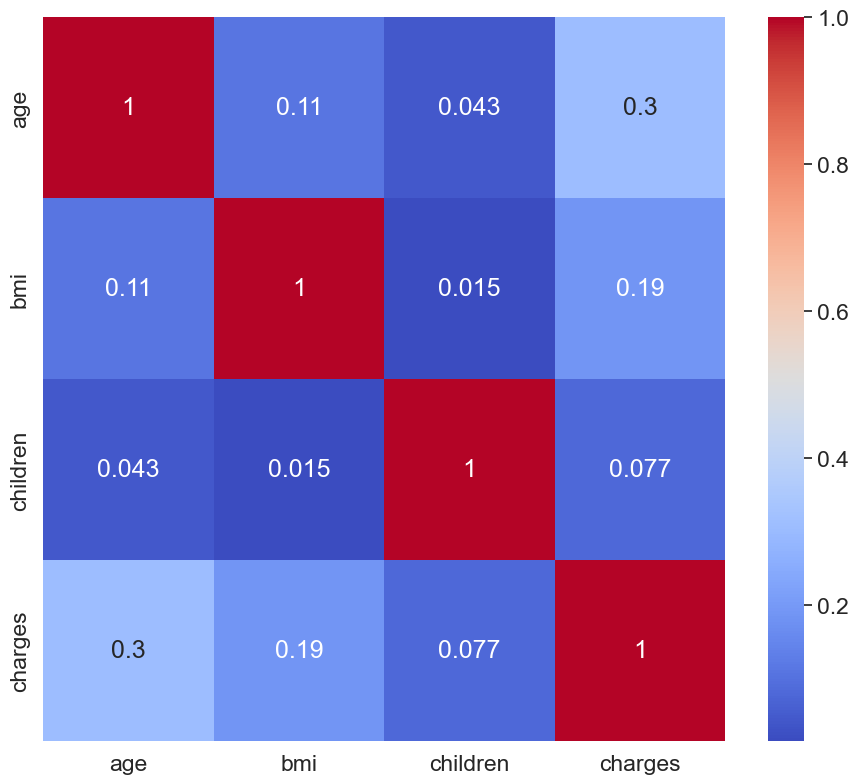

In [23]:
sns.heatmap(
    data = df.corr(numeric_only = True),
    annot = True,
    cmap = "coolwarm"
)
plt.show()

Vemos que no parece haber una buena correlación con alguna variable pero sí se puede notar que la variable Age tiene una relación lineal con Charges pero está dividida en 3 grupos.

Ahora utilizaremos un One Hot Encoder para codificar las variables categóricas y de esta manera podamos utilizarlas para encontrar correlaciones.

In [24]:
df = pd.get_dummies(df, columns = ["sex", "smoker", "region"])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


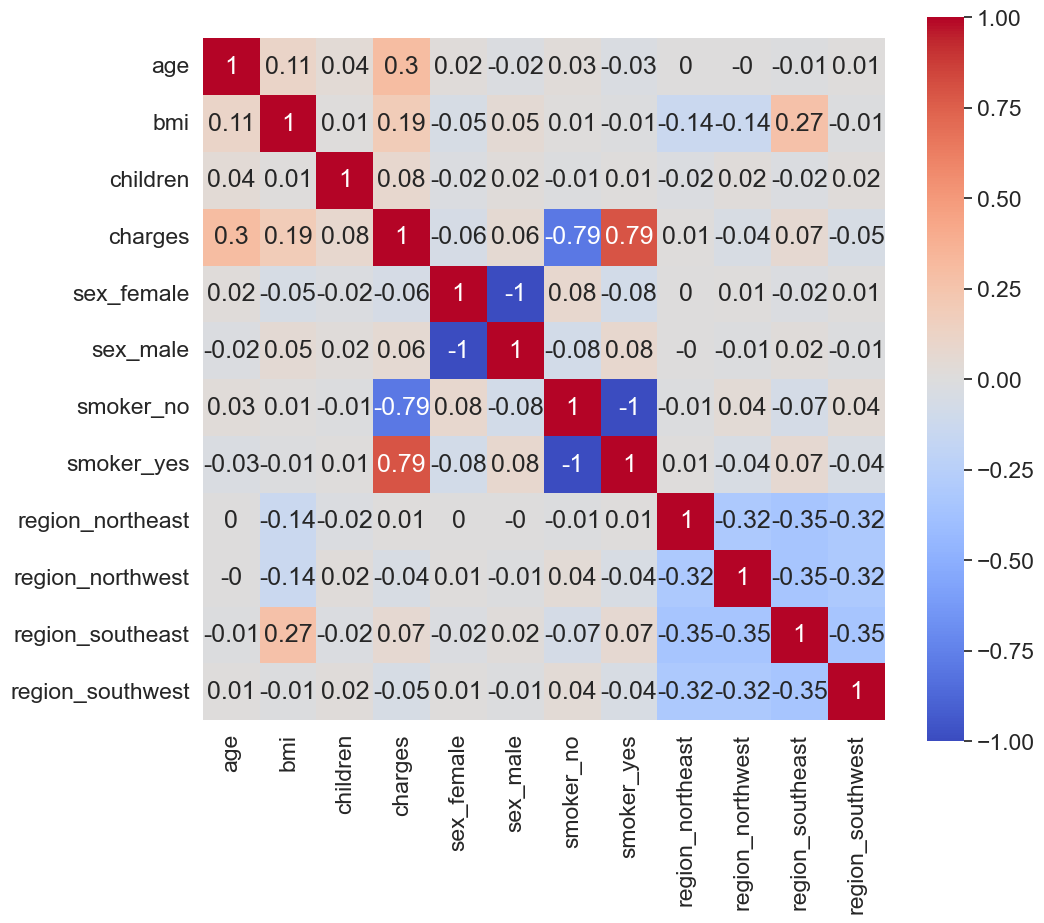

In [25]:
sns.heatmap(
    data = df.corr(numeric_only = True).round(2),
    annot = True,
    cmap = "coolwarm",
    square = True    
)
plt.show()

Con esto podemos identificar que hay una alta correlación lineal entre los gastos y si la persona es fumadora o no, siendo positiva para el caso en el que la persona fuma y negativo cuando la persona no fuma.

### Creación del modelo

Primero se creará un modelo utilizando todas las variables.

In [30]:
# Variables que utilizaremos para predecir
XCols = list(set(df.columns) - set(["charges"]))
# Variable que queremos predecir
yCols = ["charges"]

# Valores de las variables que utilizaremos para predecir
X = df[XCols].values
# Valores de la variable que queremos predecir
y = df[yCols].values

# Dividimos los datos en conjunto de entrenamiento y conjunto de testing; el 20% de los datos serán para testing
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Estandarizamos los predictores de entrenamiento
scX = StandardScaler()
XTrain = scX.fit_transform(XTrain)
XTest = scX.transform(XTest)

scy = StandardScaler()
yTrain = scy.fit_transform(yTrain)
yTest = scy.transform(yTest)

# Creamos el modelo
lr = LinearRegression()
# Ajustamos el modelo con los conjuntos de entrenamiento
lr.fit(XTrain, yTrain)

# Hacemos unas predicciones con el conjunto de testing
yPred = lr.predict(XTest)
yPred.shape

(267, 1)

**Evaluación del modelo**

In [31]:
# Encontramos el Mean Square Error
mse = metrics.mean_squared_error(yTest, yPred)
# Encontramos el R2
r2 = metrics.r2_score(yTest, yPred)

print(f"MSE: {mse.round(2)} \nR2: {r2.round(2)}")

MSE: 0.27 
R2: 0.78


Vemos que obtuvimos un modelo de predicción decente ya que tiene un $R^2$ de 0.78 y el $MSE$ es bajo.

In [37]:
# Intercepto
lr.intercept_ = lr.intercept_[0]
# Coeficientes
lr.coef_ = lr.coef_.reshape(-1)

yTest = yTest.reshape(-1)
stats.summary(lr, XTest, yTest, XCols)


Residuals:
    Min      1Q  Median     3Q    Max
-2.0774 -0.1205  0.1039 0.2411 0.9431


Coefficients:
                      Estimate                  Std. Error                     t value   p value
_intercept        3.635000e-03  3.248800e-02+0.000000e+00j  1.119000e-01+0.000000e+00j  0.911004
sex_male         -1.741885e+12  6.167600e+06+8.115002e+06j -1.034073e+05+1.360579e+05j  0.000000
region_northeast  1.394273e+13  9.013490e-01+7.947698e+05j  1.989560e+01-1.754311e+07j  0.000000
smoker_no        -3.167381e+12 -3.061625e+01+1.968973e+15j  0.000000e+00+1.600000e-03j  0.998718
sex_female       -1.741885e+12  6.166328e+06+8.092758e+06j -1.037617e+05+1.361780e+05j  0.000000
age               3.079440e-01  5.562600e-02-2.974000e-03j  5.520200e+00+2.951000e-01j  0.000000
region_northwest  1.386710e+13  2.445984e+00+5.641112e+05j  1.065884e+02-2.458221e+07j  0.000000
children          6.720500e-02  3.208000e-02-0.000000e+00j  2.094900e+00+0.000000e+00j  0.037123
smoker_yes       -3.1673

Finalmente, podemos visualizar los residuales.

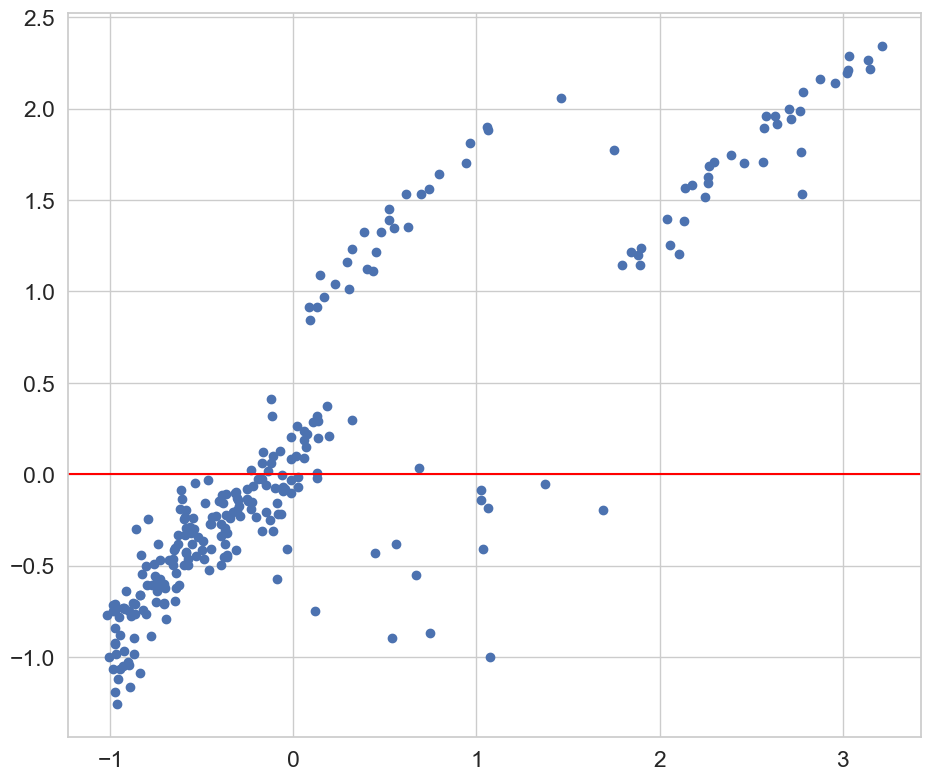

In [40]:
residuals = np.subtract(yTest, yPred)
plt.scatter(yTest, yPred)
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.show()

Estos resultados son buenos pero se pueden mejorar.

### Creación de un segundo modelo

In [43]:
# Creamos una copia del df
df2 = df.copy()
# Elevamos la edad al cuadrado para darle más peso a las edades más grandes y ver si aparece alguna correlación
df2["age2"] = df2.age ** 2
# Creamos una variable que represente si tiene o no sobrepeso; falso es 0 y verdadero es 1
df2["overweight"] = (df2.bmi >= 30).astype(int)
# Creamos una variable que representa si tiene sobrepeso y fuma
df2["smoker_overweight"] = df2.overweight * df2.smoker_yes

df2.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age2,overweight,smoker_overweight
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,361,0,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,1024,0,0


Utilizamos todas las variables.

In [45]:
# Variables que utilizaremos para predecir
XCols = list(set(df2.columns) - set(["charges"]))
# Variable que queremos predecir
yCols = ["charges"]

# Valores de las variables que utilizaremos para predecir
X = df2[XCols].values
# Valores de la variable que queremos predecir
y = df2[yCols].values

# Dividimos los datos en conjunto de entrenamiento y conjunto de testing; el 20% de los datos serán para testing
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Estandarizamos los predictores de entrenamiento
scX = StandardScaler()
XTrain = scX.fit_transform(XTrain)
XTest = scX.transform(XTest)

scy = StandardScaler()
yTrain = scy.fit_transform(yTrain)
yTest = scy.transform(yTest)

# Creamos el modelo
lr2 = LinearRegression()
# Ajustamos el modelo con los conjuntos de entrenamiento
lr2.fit(XTrain, yTrain)

# Hacemos unas predicciones con el conjunto de testing
yPred = lr2.predict(XTest)
yPred.shape

(267, 1)

Calculamos las métricas.

In [46]:
# Encontramos el Mean Square Error
mse = metrics.mean_squared_error(yTest, yPred)
# Encontramos el R2
r2 = metrics.r2_score(yTest, yPred)

print(f"MSE: {mse.round(2)} \nR2: {r2.round(2)}")

MSE: 0.13 
R2: 0.89


In [49]:
# Intercepto
lr2.intercept_ = lr2.intercept_[0]
# Coeficientes
lr2.coef_ = lr2.coef_.reshape(-1)
yTest = yTest.reshape(-1)
stats.summary(lr2, XTest, yTest, XCols)

Residuals:
    Min     1Q  Median     3Q    Max
-1.9031 0.0472  0.1211 0.1553 0.4473


Coefficients:
                       Estimate                  Std. Error                     t value   p value
_intercept         1.996000e-03  2.328300e-02+0.000000e+00j  8.570000e-02+0.000000e+00j  0.931739
sex_male          -1.163333e+12  8.517389e+06+1.280730e+06j -1.335634e+05+2.008346e+04j  0.000000
region_northeast   7.739686e+12  4.758586e+04+4.670198e+05j  1.671264e+06-1.640221e+07j  0.000000
smoker_no         -2.634550e+11 -3.948405e+03+3.026778e+14j  0.000000e+00+9.000000e-04j  0.999306
sex_female        -1.163333e+12  9.066097e+06+1.179007e+06j -1.261828e+05+1.640953e+04j  0.000000
age               -1.319140e-01  1.185320e-01-9.000000e-06j -1.112900e+00-1.000000e-04j  0.266758
region_northwest   7.697703e+12  4.675437e+04+4.365499e+05j  1.867078e+06-1.743308e+07j  0.000000
children           8.759800e-02  2.232000e-02+1.000000e-06j  3.924700e+00-2.000000e-04j  0.000111
overweight       

Vemos que este modelo es mucho mejor ya que alcanzamos un $R^2$ de 0.89

Visualizamos los residuales

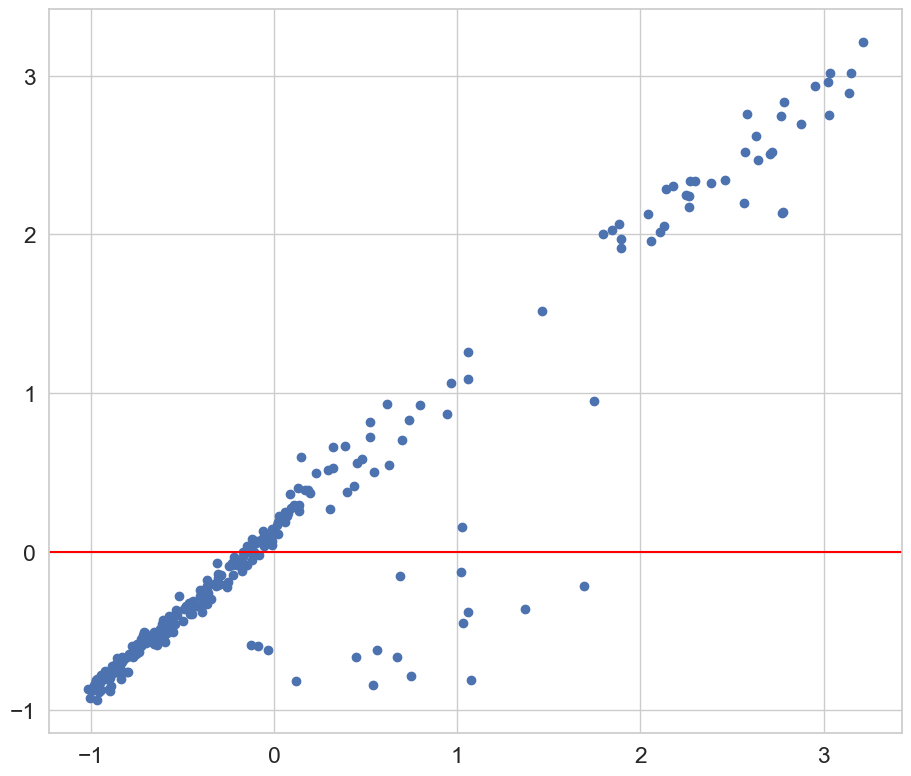

In [50]:
residuals = np.subtract(yTest, yPred)
plt.scatter(yTest, yPred)
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.show()

Ahora, vamos a tomar las variables que tengan un p-valor menor a 0.05 y las utilizaremos para crear otro modelo: sex_male, region_northeast, sex_female, region_northwest, children, region_southwest, smoker_overweight, age2, region_southeast.

### Creación de un tercer modelo.

In [55]:
# Variables que utilizaremos para predecir
XCols = ["sex_male", "region_northeast", "sex_female", "region_northwest", "children", "region_southwest", "smoker_overweight", "age2", "region_southeast"]
# Variable que queremos predecir
yCols = ["charges"]

# Valores de las variables que utilizaremos para predecir
X = df2[XCols].values
# Valores de la variable que queremos predecir
y = df2[yCols].values

# Dividimos los datos en conjunto de entrenamiento y conjunto de testing; el 20% de los datos serán para testing
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Estandarizamos los predictores de entrenamiento
scX = StandardScaler()
XTrain = scX.fit_transform(XTrain)
XTest = scX.transform(XTest)

scy = StandardScaler()
yTrain = scy.fit_transform(yTrain)
yTest = scy.transform(yTest)

# Creamos el modelo y especificamos que no use el intercepto
lr2 = LinearRegression(fit_intercept = False)
# Ajustamos el modelo con los conjuntos de entrenamiento
lr2.fit(XTrain, yTrain)

# Hacemos unas predicciones con el conjunto de testing
yPred = lr2.predict(XTest)
yPred.shape

(267, 1)

Calculamos las métricas.

In [56]:
# Encontramos el Mean Square Error
mse = metrics.mean_squared_error(yTest, yPred)
# Encontramos el R2
r2 = metrics.r2_score(yTest, yPred)

print(f"MSE: {mse.round(2)} \nR2: {r2.round(2)}")

MSE: 0.24 
R2: 0.8


In [60]:
# Coeficientes
lr2.coef_ = lr2.coef_.reshape(-1)
yTest = yTest.reshape(-1)
stats.summary(lr2, XTest, yTest, XCols)

Residuals:
    Min      1Q  Median     3Q    Max
-1.8613 -0.0165  0.2498 0.2722 0.3452


Coefficients:
                   Estimate                  Std. Error          t value   p value
_intercept         0.000000  3.042300e-02+0.000000e+00j   0.0000+0.0000j  1.000000
sex_male          -0.010103  8.456761e+06+4.793843e+04j  -0.0000+0.0000j  1.000000
region_northeast   0.030146  1.291272e+05+7.293211e+05j   0.0000-0.0000j  1.000000
sex_female         0.010103  8.467747e+06+4.599335e+04j   0.0000-0.0000j  1.000000
region_northwest   0.013477  1.277301e+05+7.214302e+05j   0.0000-0.0000j  1.000000
children           0.079142  2.994600e-02+0.000000e+00j   2.6428-0.0000j  0.008709
region_southwest  -0.044619  1.305042e+05+7.370988e+05j  -0.0000+0.0000j  1.000000
smoker_overweight  0.790199  2.958200e-02-0.000000e+00j  26.7123+0.0000j  0.000000
age2               0.329703  3.071200e-02-0.000000e+00j  10.7354+0.0000j  0.000000
region_southeast   0.001241  1.431732e+05+8.086539e+05j   0.0000-0.

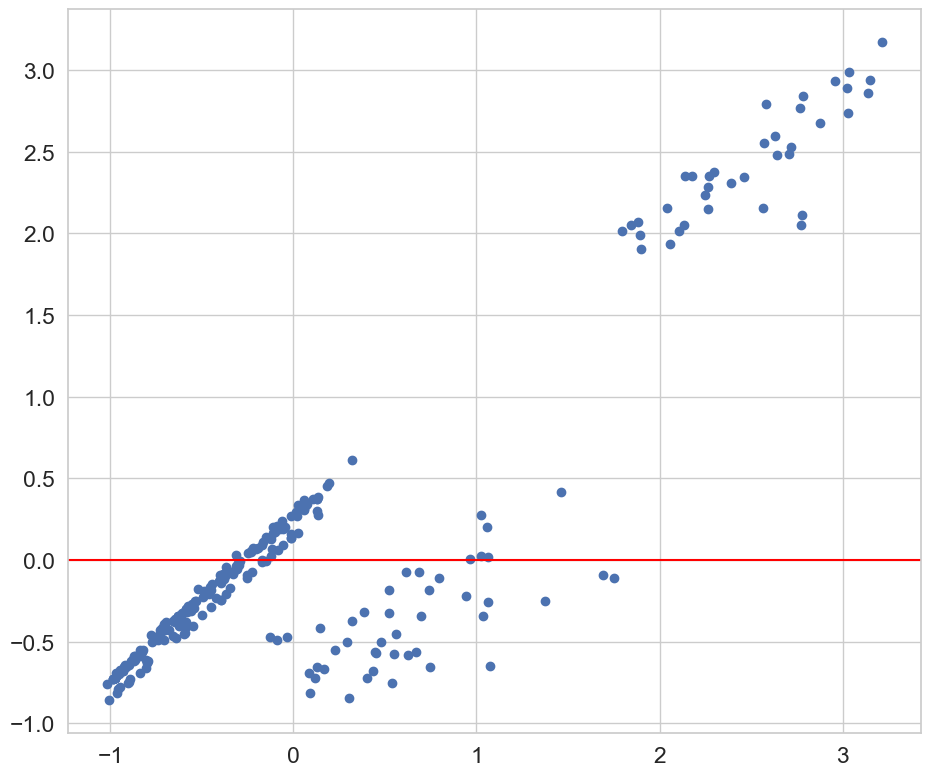

In [58]:
residuals = np.subtract(yTest, yPred)
plt.scatter(yTest, yPred)
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.show()

Vemos que las variables de la región y el sexo no nos aportan mucho al modelo así que las quitamos.

### Creación de un cuarto modelo

In [61]:
# Variables que utilizaremos para predecir
XCols = [ "children", "smoker_overweight", "age2"]
# Variable que queremos predecir
yCols = ["charges"]

# Valores de las variables que utilizaremos para predecir
X = df2[XCols].values
# Valores de la variable que queremos predecir
y = df2[yCols].values

# Dividimos los datos en conjunto de entrenamiento y conjunto de testing; el 20% de los datos serán para testing
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Estandarizamos los predictores de entrenamiento
scX = StandardScaler()
XTrain = scX.fit_transform(XTrain)
XTest = scX.transform(XTest)

scy = StandardScaler()
yTrain = scy.fit_transform(yTrain)
yTest = scy.transform(yTest)

# Creamos el modelo y especificamos que no use el intercepto
lr2 = LinearRegression(fit_intercept = False)
# Ajustamos el modelo con los conjuntos de entrenamiento
lr2.fit(XTrain, yTrain)

# Hacemos unas predicciones con el conjunto de testing
yPred = lr2.predict(XTest)
yPred.shape

(267, 1)

Calculamos las métricas.

In [62]:
# Encontramos el Mean Square Error
mse = metrics.mean_squared_error(yTest, yPred)
# Encontramos el R2
r2 = metrics.r2_score(yTest, yPred)

print(f"MSE: {mse.round(2)} \nR2: {r2.round(2)}")

MSE: 0.24 
R2: 0.81


In [63]:
# Coeficientes
lr2.coef_ = lr2.coef_.reshape(-1)
yTest = yTest.reshape(-1)
stats.summary(lr2, XTest, yTest, XCols)

Residuals:
    Min      1Q  Median     3Q    Max
-1.8744 -0.0117  0.2266 0.2563 0.3419


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.029901   0.0000  1.000000
children           0.077506    0.029441   2.6326  0.008969
smoker_overweight  0.786257    0.025135  31.2808  0.000000
age2               0.330136    0.029799  11.0787  0.000000
---
R-squared:  0.80598,    Adjusted R-squared:  0.80377
F-statistic: 364.17 on 3 features


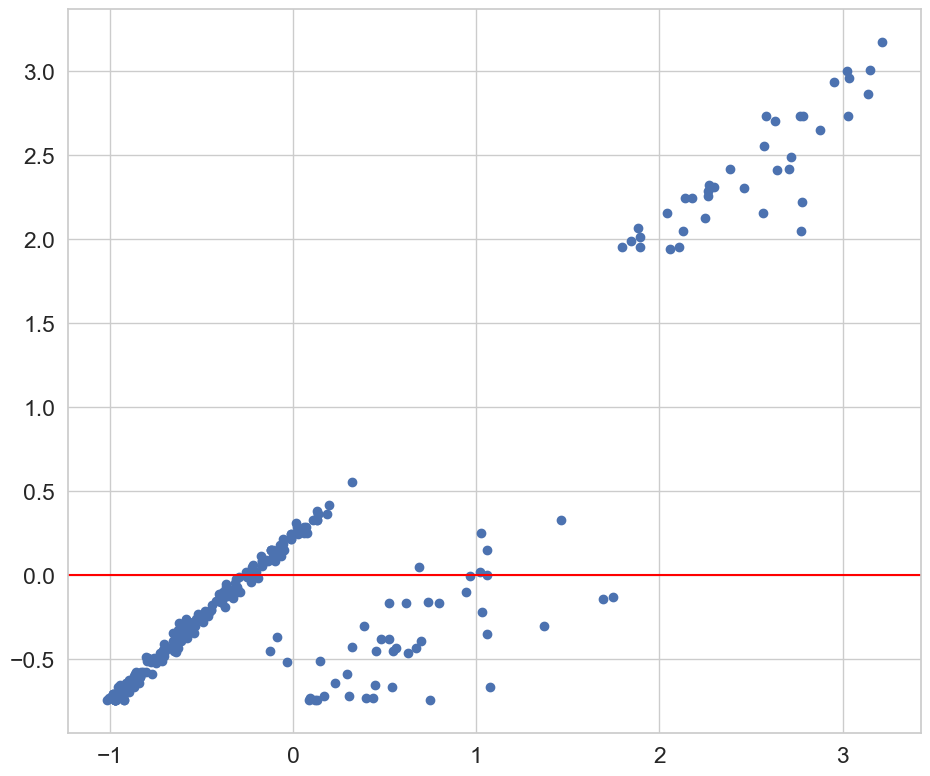

In [64]:
residuals = np.subtract(yTest, yPred)
plt.scatter(yTest, yPred)
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.show()

Con tres variables obtuvimos un modelo bastante bueno con un $R^2$ de 0.8